In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'

In [2]:
data = pd.read_csv('0402TC-data下车时间五.csv',low_memory=False,usecols=['enstation_time','exstation_time'])

In [3]:
data['enstation_time'] = pd.to_datetime(data['enstation_time'])
data['exstation_time'] = pd.to_datetime(data['exstation_time'],format='mixed')
data = data[~data['exstation_time'].isna()]
data = data[data['enstation_time'] != data['exstation_time']]
data

,enstation_time,exstation_time
0,2022-11-10 18:11:29,2022-11-10 19:01:01
1,2022-11-10 08:06:49,2022-11-10 08:17:50
2,2022-11-10 16:00:15,2022-11-10 16:18:43
3,2022-11-10 08:37:26,2022-11-10 10:00:47
4,2022-11-10 18:38:21,2022-11-10 19:00:04
...,...,...
6314851,2022-11-09 18:26:06,2022-11-09 19:19:39
6314852,2022-11-09 18:56:18,2022-11-09 19:39:59
6314853,2022-11-09 08:31:19,2022-11-09 08:57:17
6314854,2022-11-09 18:00:01,2022-11-09 18:10:06


In [4]:
data[data['exstation_time'].isna()]

,enstation_time,exstation_time


In [5]:
data['duration'] = ((data['exstation_time'] - data['enstation_time']).dt.seconds) / 60

In [6]:
data['duration_round'] = np.round(data['duration'])

In [7]:
duration_round = data['duration_round'].value_counts()
duration = data['duration'].value_counts()

In [8]:
duration.iloc[0]

4946

In [9]:
duration_round = pd.DataFrame(duration_round).sort_values('duration_round')
duration = pd.DataFrame(duration).sort_values('duration')

In [10]:
def count_method(url):
    data = pd.read_csv(url,low_memory=False,usecols=['enstation_time','exstation_time'])
    data['enstation_time'] = pd.to_datetime(data['enstation_time'])
    data['exstation_time'] = pd.to_datetime(data['exstation_time'],format='mixed')
    data = data[~data['exstation_time'].isna()]
    data = data[data['enstation_time'] != data['exstation_time']]
    data['duration'] = ((data['exstation_time'] - data['enstation_time']).dt.seconds) / 60
    data['duration_round'] = np.round(data['duration'])
    duration = data['duration'].value_counts()
    duration_round = data['duration_round'].value_counts()
    duration_round = pd.DataFrame(duration_round).sort_values('duration_round')
    duration = pd.DataFrame(duration).sort_values('duration')
    return [duration,duration_round]

In [11]:
TC_data = count_method('0402TC-data下车时间五.csv')

In [12]:
UTC_data_CatBoost = count_method('0402CatBoost下车时间五.csv')
UTC_data_XGBoost = count_method('0402XG下车时间五.csv')
UTC_data_RF = count_method('0402RF下车时间五.csv')
UTC_data_SVM = count_method('D:/Code/YYH/1014小论文/0314补充实验/0227SVM下车时间.csv')

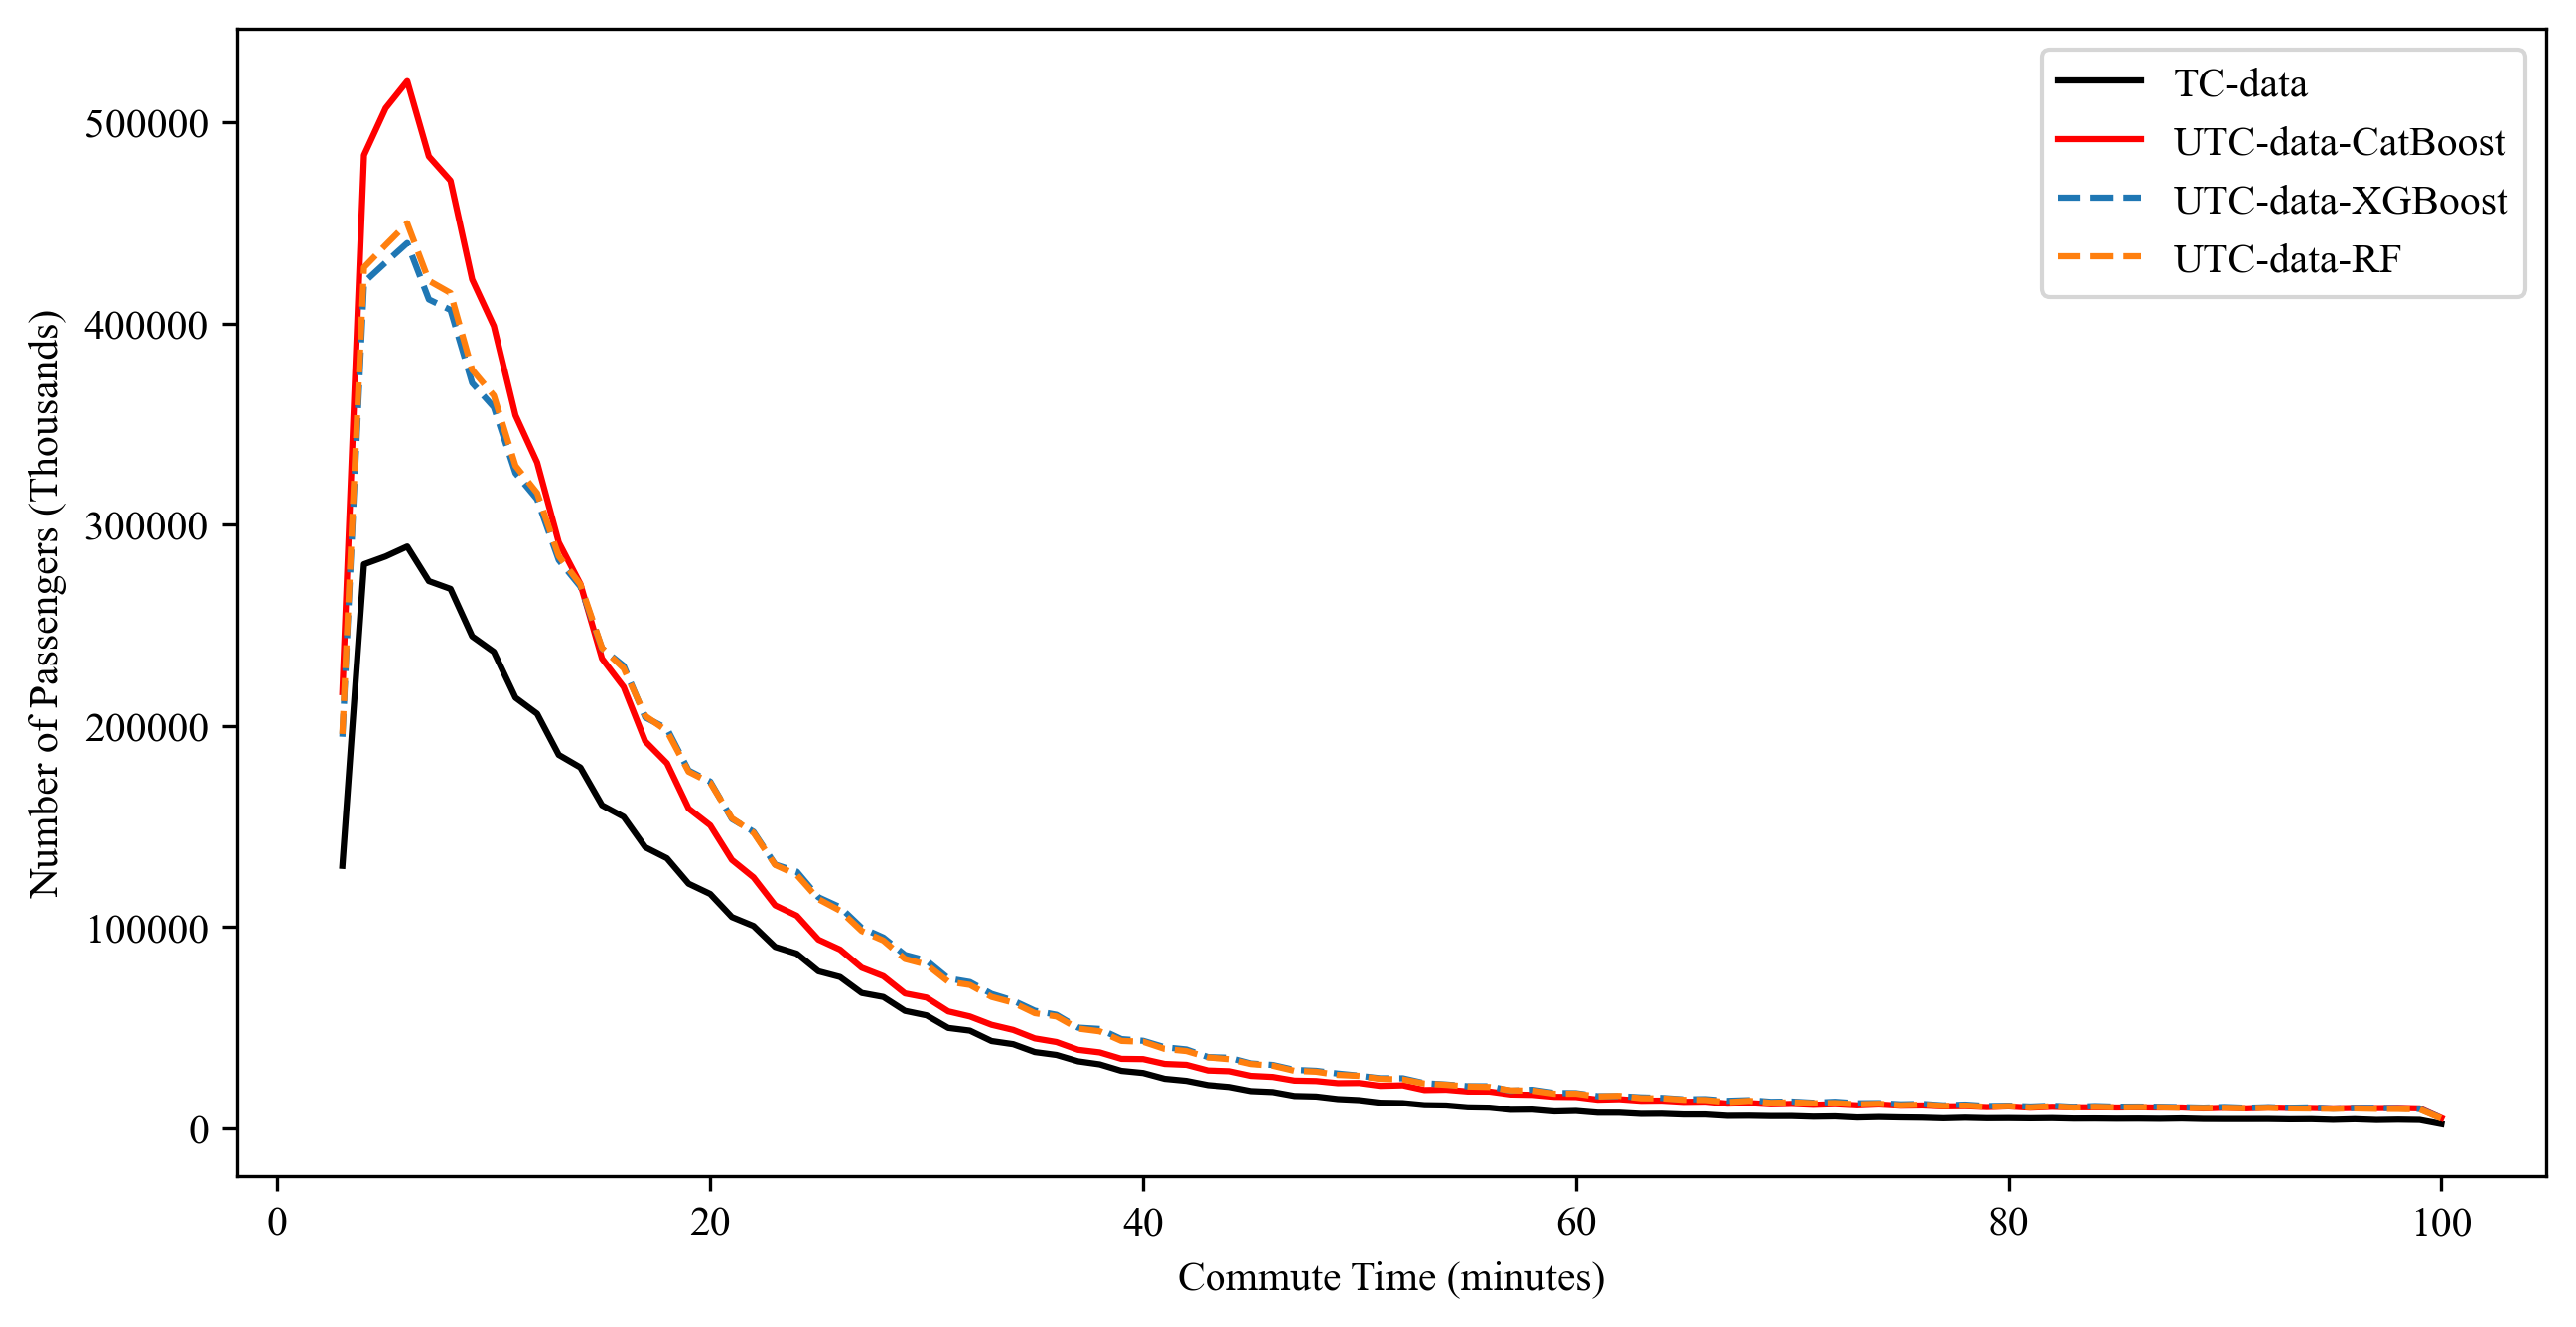

In [13]:
# 按秒有round
fig = plt.figure(dpi=300,figsize=(10,5))
ax1 = plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
lw = 1.5
r = 1
ax1 = plt.plot(TC_data[r].index,TC_data[r]['count'],label='TC-data',linewidth=lw,color='black')
ax1 = plt.plot(UTC_data_CatBoost[r].index,UTC_data_CatBoost[r]['count'],label='UTC-data-CatBoost',linewidth=lw,color='red')
ax1 = plt.plot(UTC_data_XGBoost[r].index,UTC_data_XGBoost[r]['count'],label='UTC-data-XGBoost',linewidth=lw, linestyle='--')
ax1 = plt.plot(UTC_data_RF[r].index,UTC_data_RF[r]['count'],label='UTC-data-RF',linewidth=lw, linestyle='--')
# ax1 = plt.plot(UTC_data_SVM[r][:60].index,UTC_data_SVM[r]['count'][:60],label='UTC-data-SVM',linewidth=lw, linestyle='--')
plt.xlabel('Commute Time (minutes)')
plt.ylabel('Number of Passengers (Thousands)')
ax1 = plt.legend()

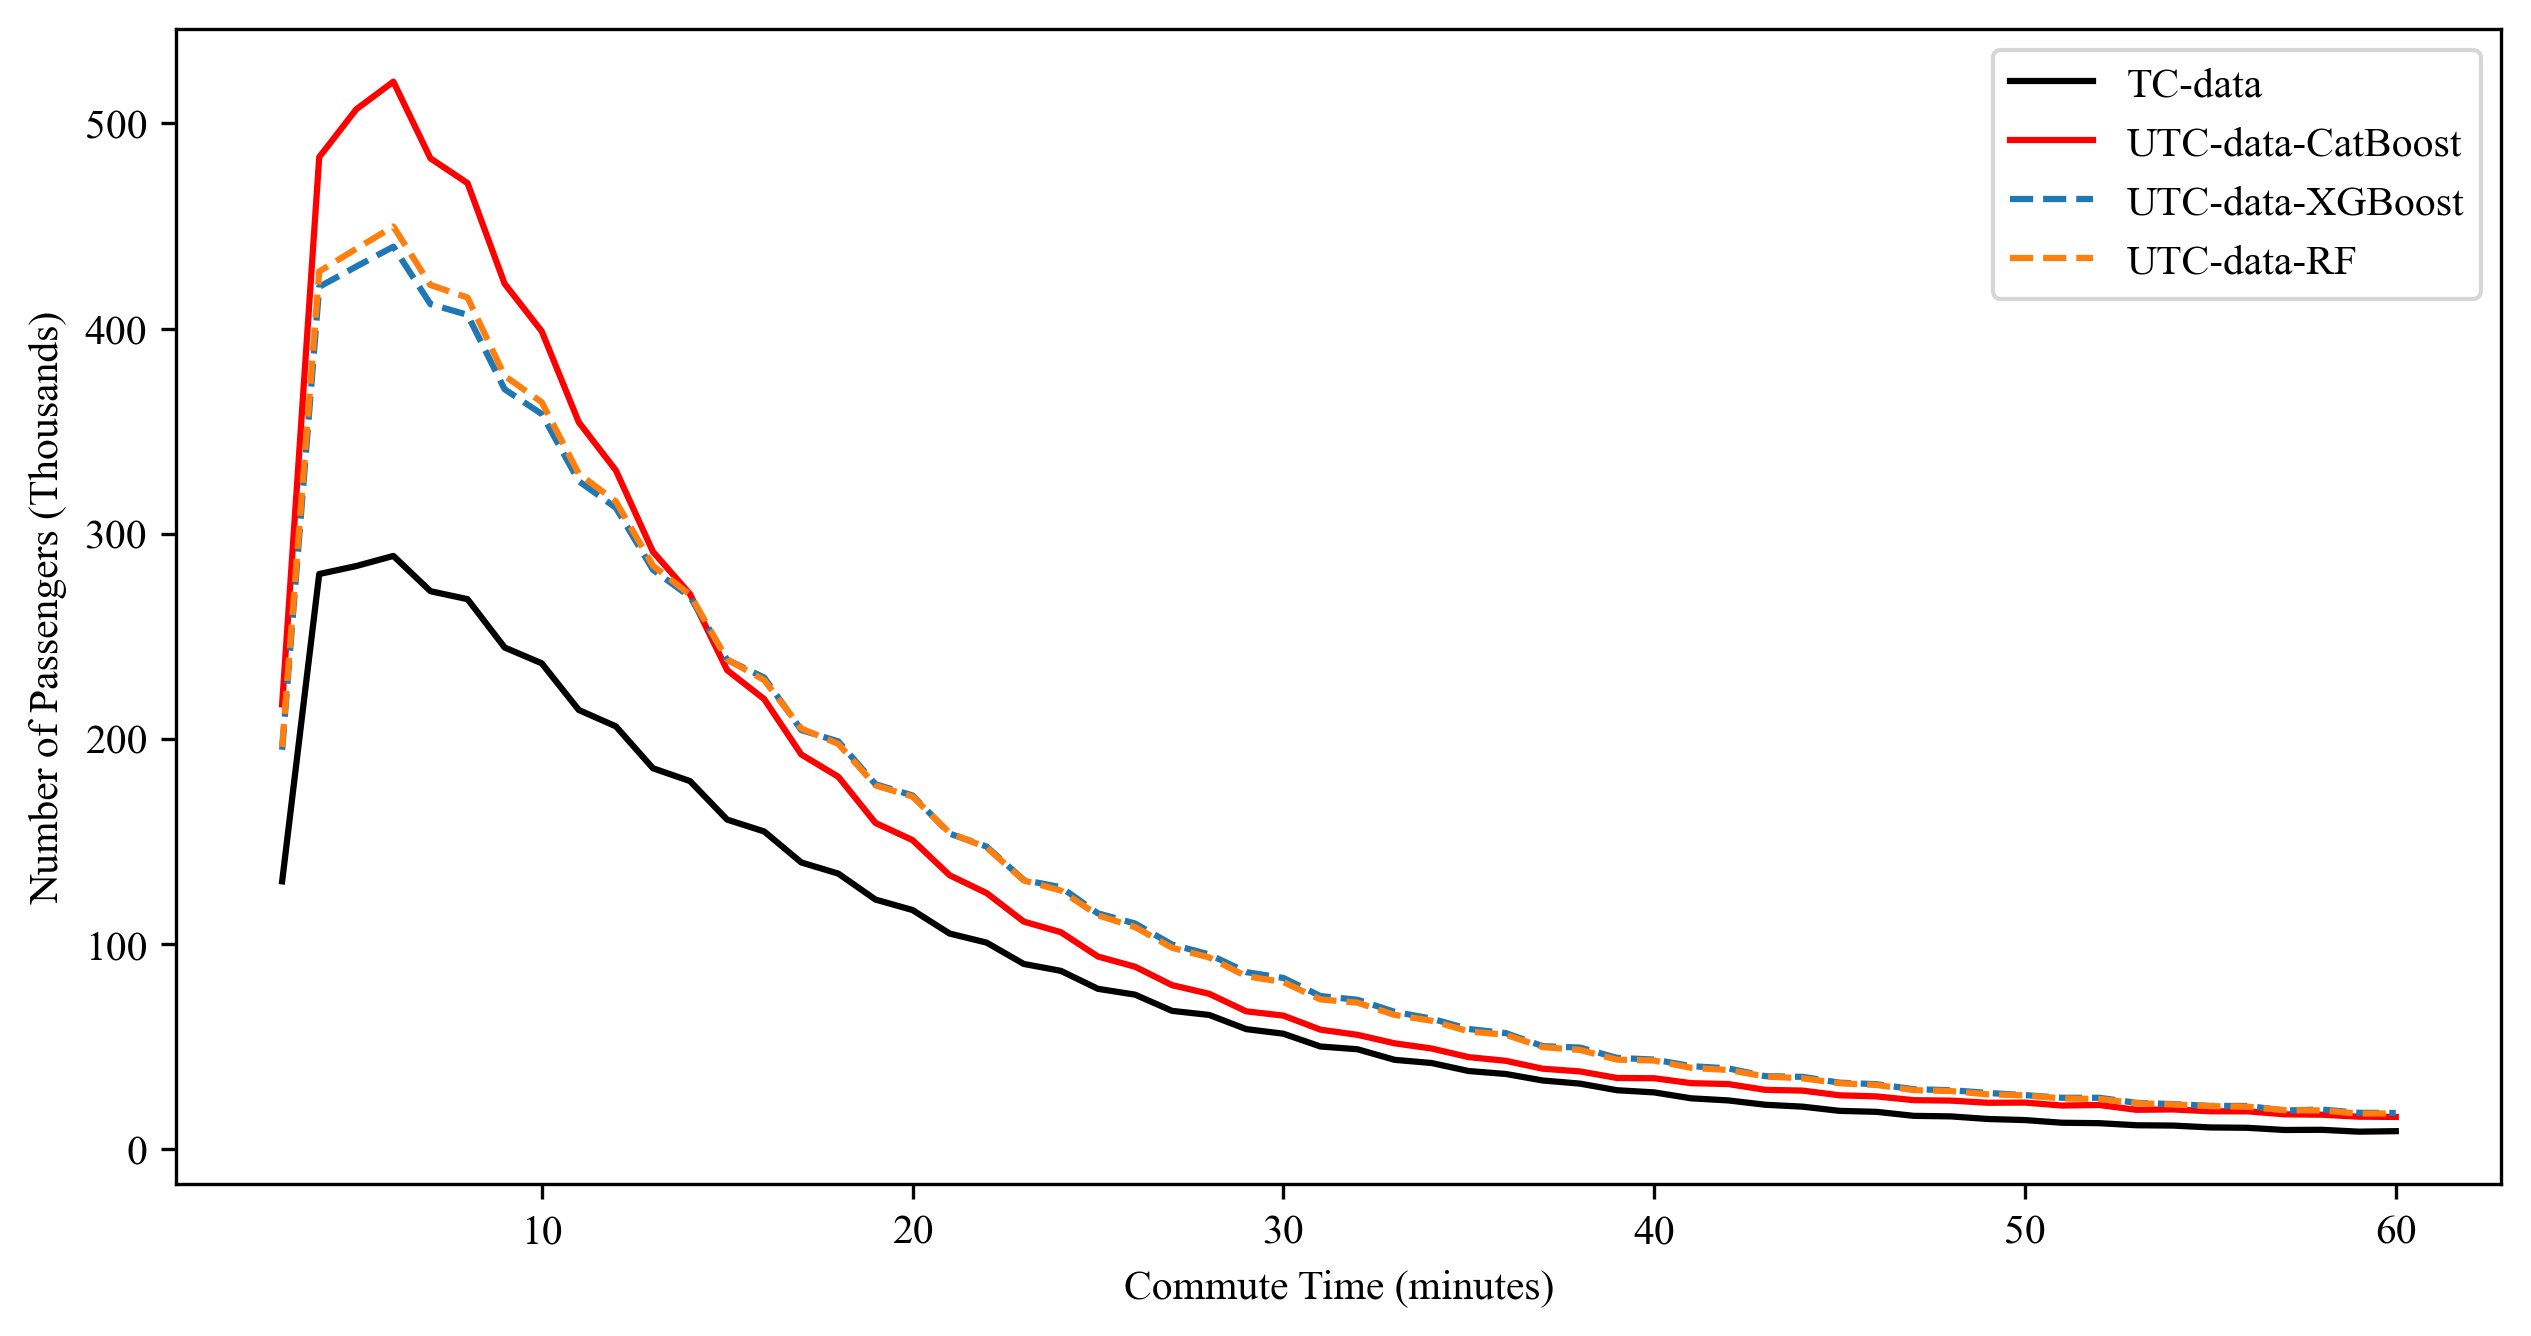

In [14]:
# 1min有round
fig = plt.figure(dpi=300,figsize=(10,5))
ax1 = plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
lw = 1.5
r = 1
ax1 = plt.plot(TC_data[r][:60].index,TC_data[r]['count'][:60] / 1000,label='TC-data',linewidth=lw,color='black')
ax1 = plt.plot(UTC_data_CatBoost[r][:60].index,UTC_data_CatBoost[r]['count'][:60] / 1000,label='UTC-data-CatBoost',linewidth=lw,color='red')
ax1 = plt.plot(UTC_data_XGBoost[r][:60].index,UTC_data_XGBoost[r]['count'][:60] / 1000,label='UTC-data-XGBoost',linewidth=lw, linestyle='--')
ax1 = plt.plot(UTC_data_RF[r][:60].index,UTC_data_RF[r]['count'][:60] / 1000,label='UTC-data-RF',linewidth=lw, linestyle='--')
# ax1 = plt.plot(UTC_data_SVM[r][:60].index,UTC_data_SVM[r]['count'][:60],label='UTC-data-SVM',linewidth=lw, linestyle='--')
plt.xlabel('Commute Time (minutes)')
plt.ylabel('Number of Passengers (Thousands)')
ax1 = plt.legend()

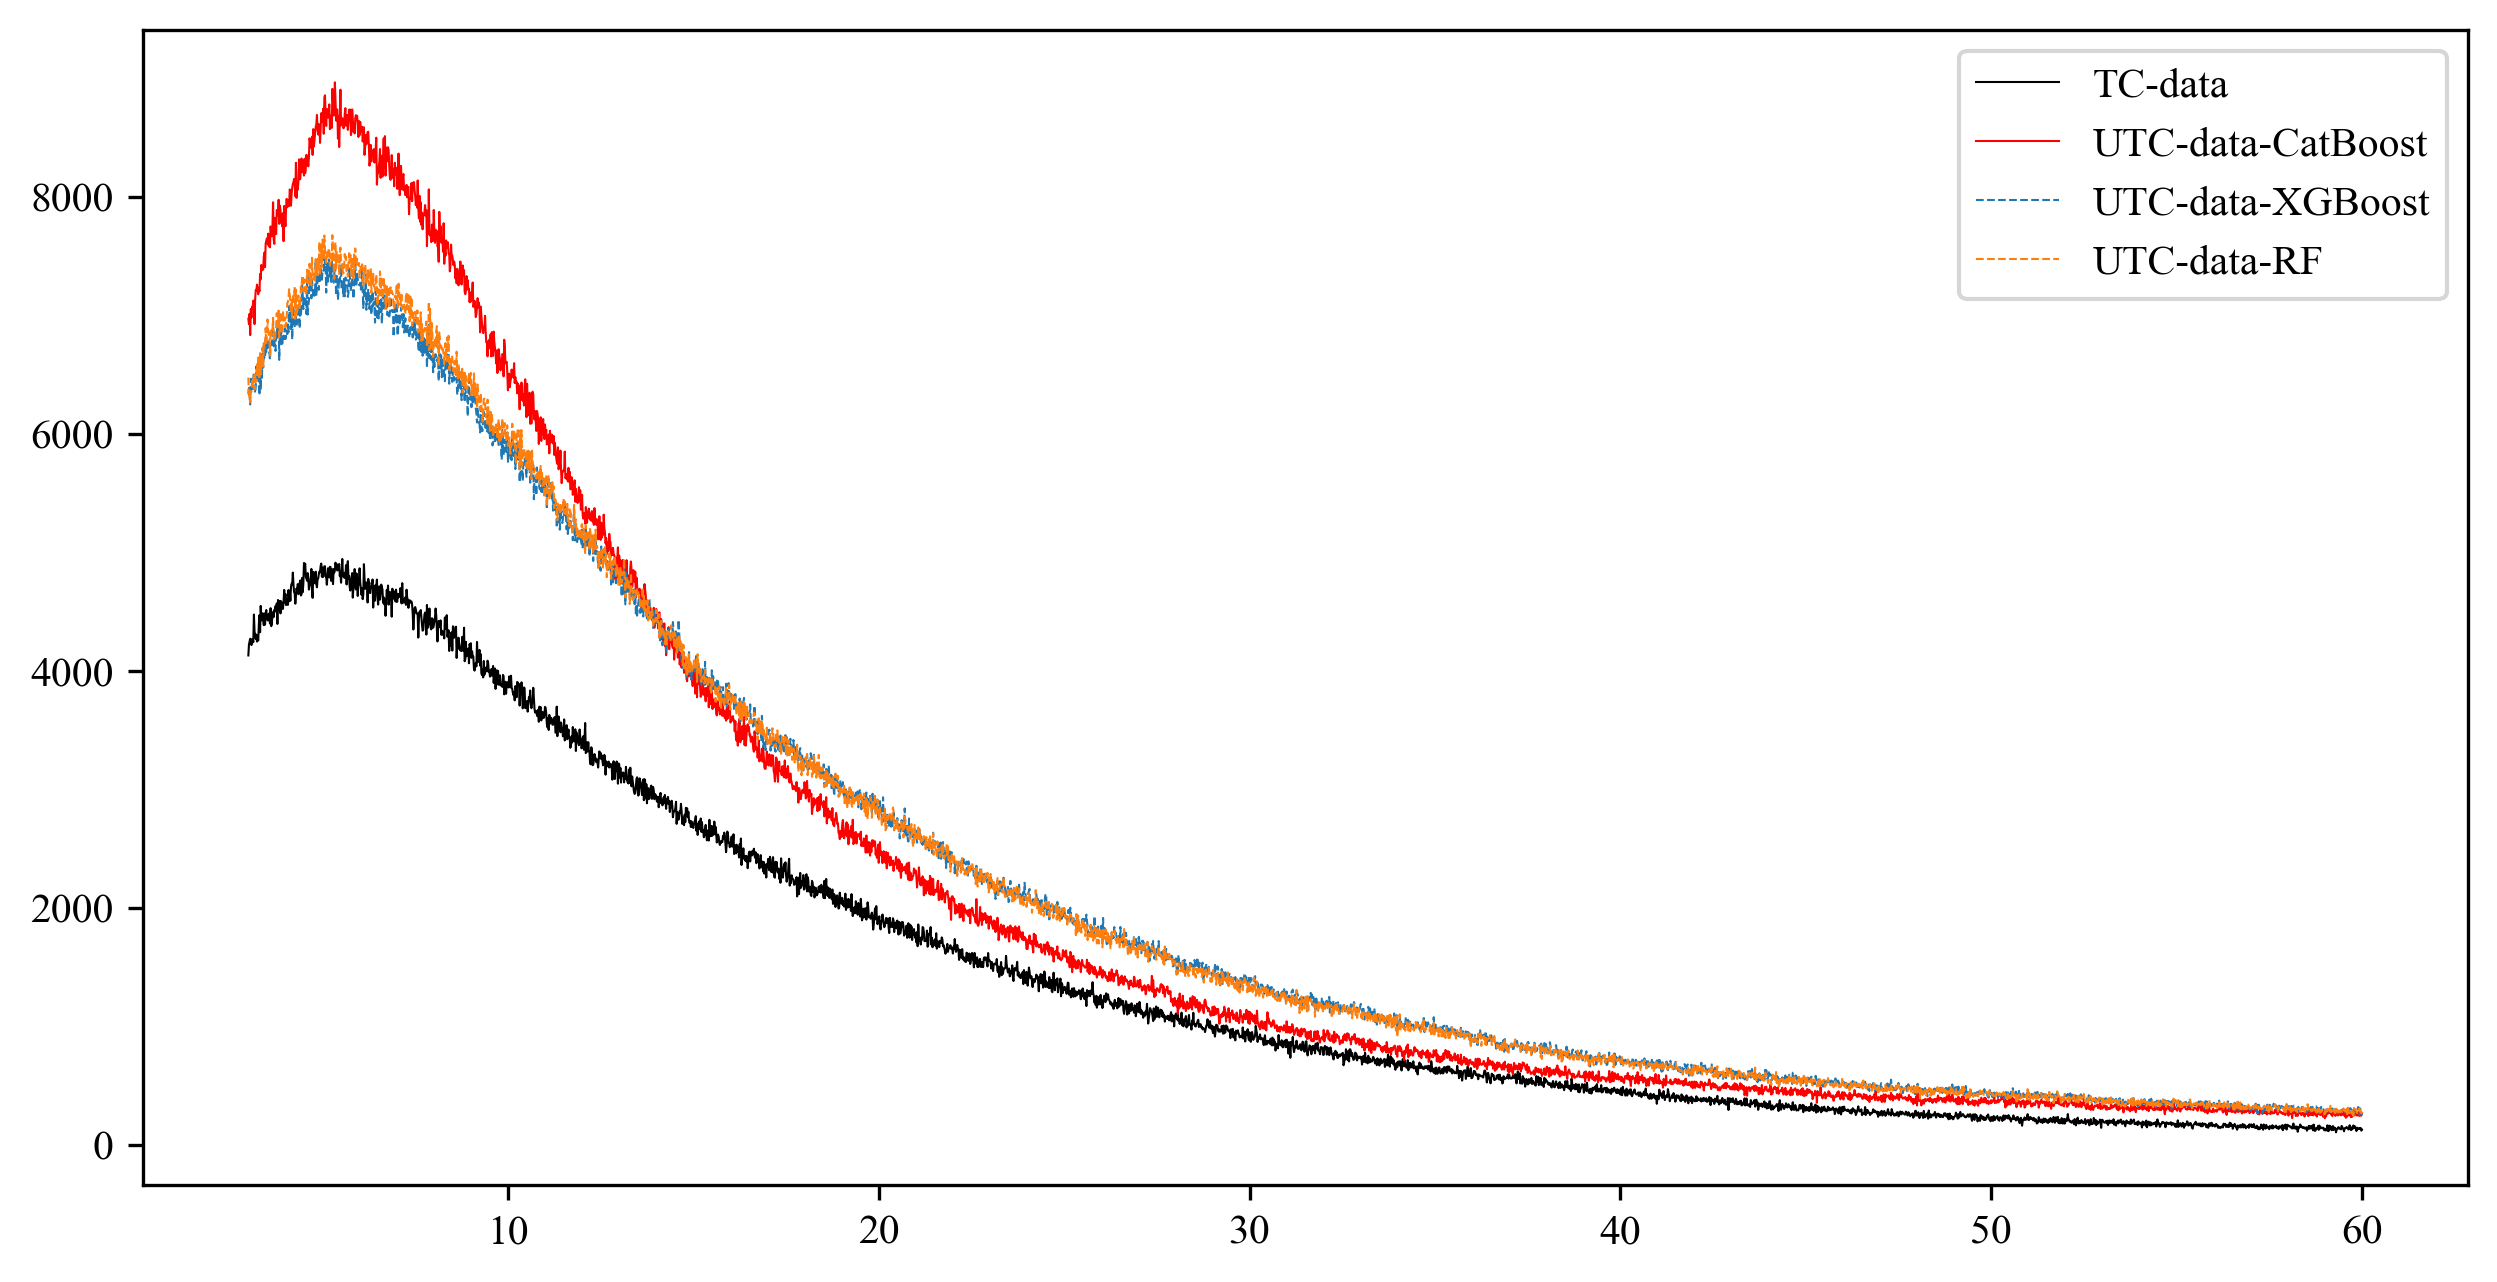

In [15]:
# 1min无round
fig = plt.figure(dpi=300,figsize=(10,5))
ax1 = plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
lw = 0.5
ax1 = plt.plot(TC_data[0][:60].index,TC_data[0]['count'][:60],label='TC-data',linewidth=lw,color='black')
ax1 = plt.plot(UTC_data_CatBoost[0][:60].index,UTC_data_CatBoost[0]['count'][:60],label='UTC-data-CatBoost',linewidth=lw,color='red')
ax1 = plt.plot(UTC_data_XGBoost[0][:60].index,UTC_data_XGBoost[0]['count'][:60],label='UTC-data-XGBoost',linewidth=lw, linestyle='--')
ax1 = plt.plot(UTC_data_RF[0][:60].index,UTC_data_RF[0]['count'][:60],label='UTC-data-RF',linewidth=lw, linestyle='--')
# ax1 = plt.plot(UTC_data_SVM[0][:60].index,UTC_data_SVM[0]['count'][:60],label='UTC-data-SVM',linewidth=lw, linestyle='--')
ax1 = plt.legend()

In [16]:
def count_method_sample(url):
    data = pd.read_csv(url,low_memory=False,usecols=['enstation_time','exstation_time'])
    data['enstation_time'] = pd.to_datetime(data['enstation_time'])
    data['exstation_time'] = pd.to_datetime(data['exstation_time'],format='mixed')
    data = data[~data['exstation_time'].isna()]
    data = data[data['enstation_time'] != data['exstation_time']]
    data['duration'] = ((data['exstation_time'] - data['enstation_time']).dt.seconds) / 60
    data['duration_round'] = np.round(data['duration'])
    data = data.sample(2000000)
    duration = data['duration'].value_counts()
    duration_round = data['duration_round'].value_counts()
    duration_round = pd.DataFrame(duration_round).sort_values('duration_round')
    duration = pd.DataFrame(duration).sort_values('duration')
    return [duration,duration_round]

In [17]:
TC_data = count_method_sample('0402TC-data下车时间五.csv')
UTC_data_CatBoost = count_method_sample('0402CatBoost下车时间五.csv')
UTC_data_XGBoost = count_method_sample('0402XG下车时间五.csv')
UTC_data_RF = count_method_sample('0402RF下车时间五.csv')

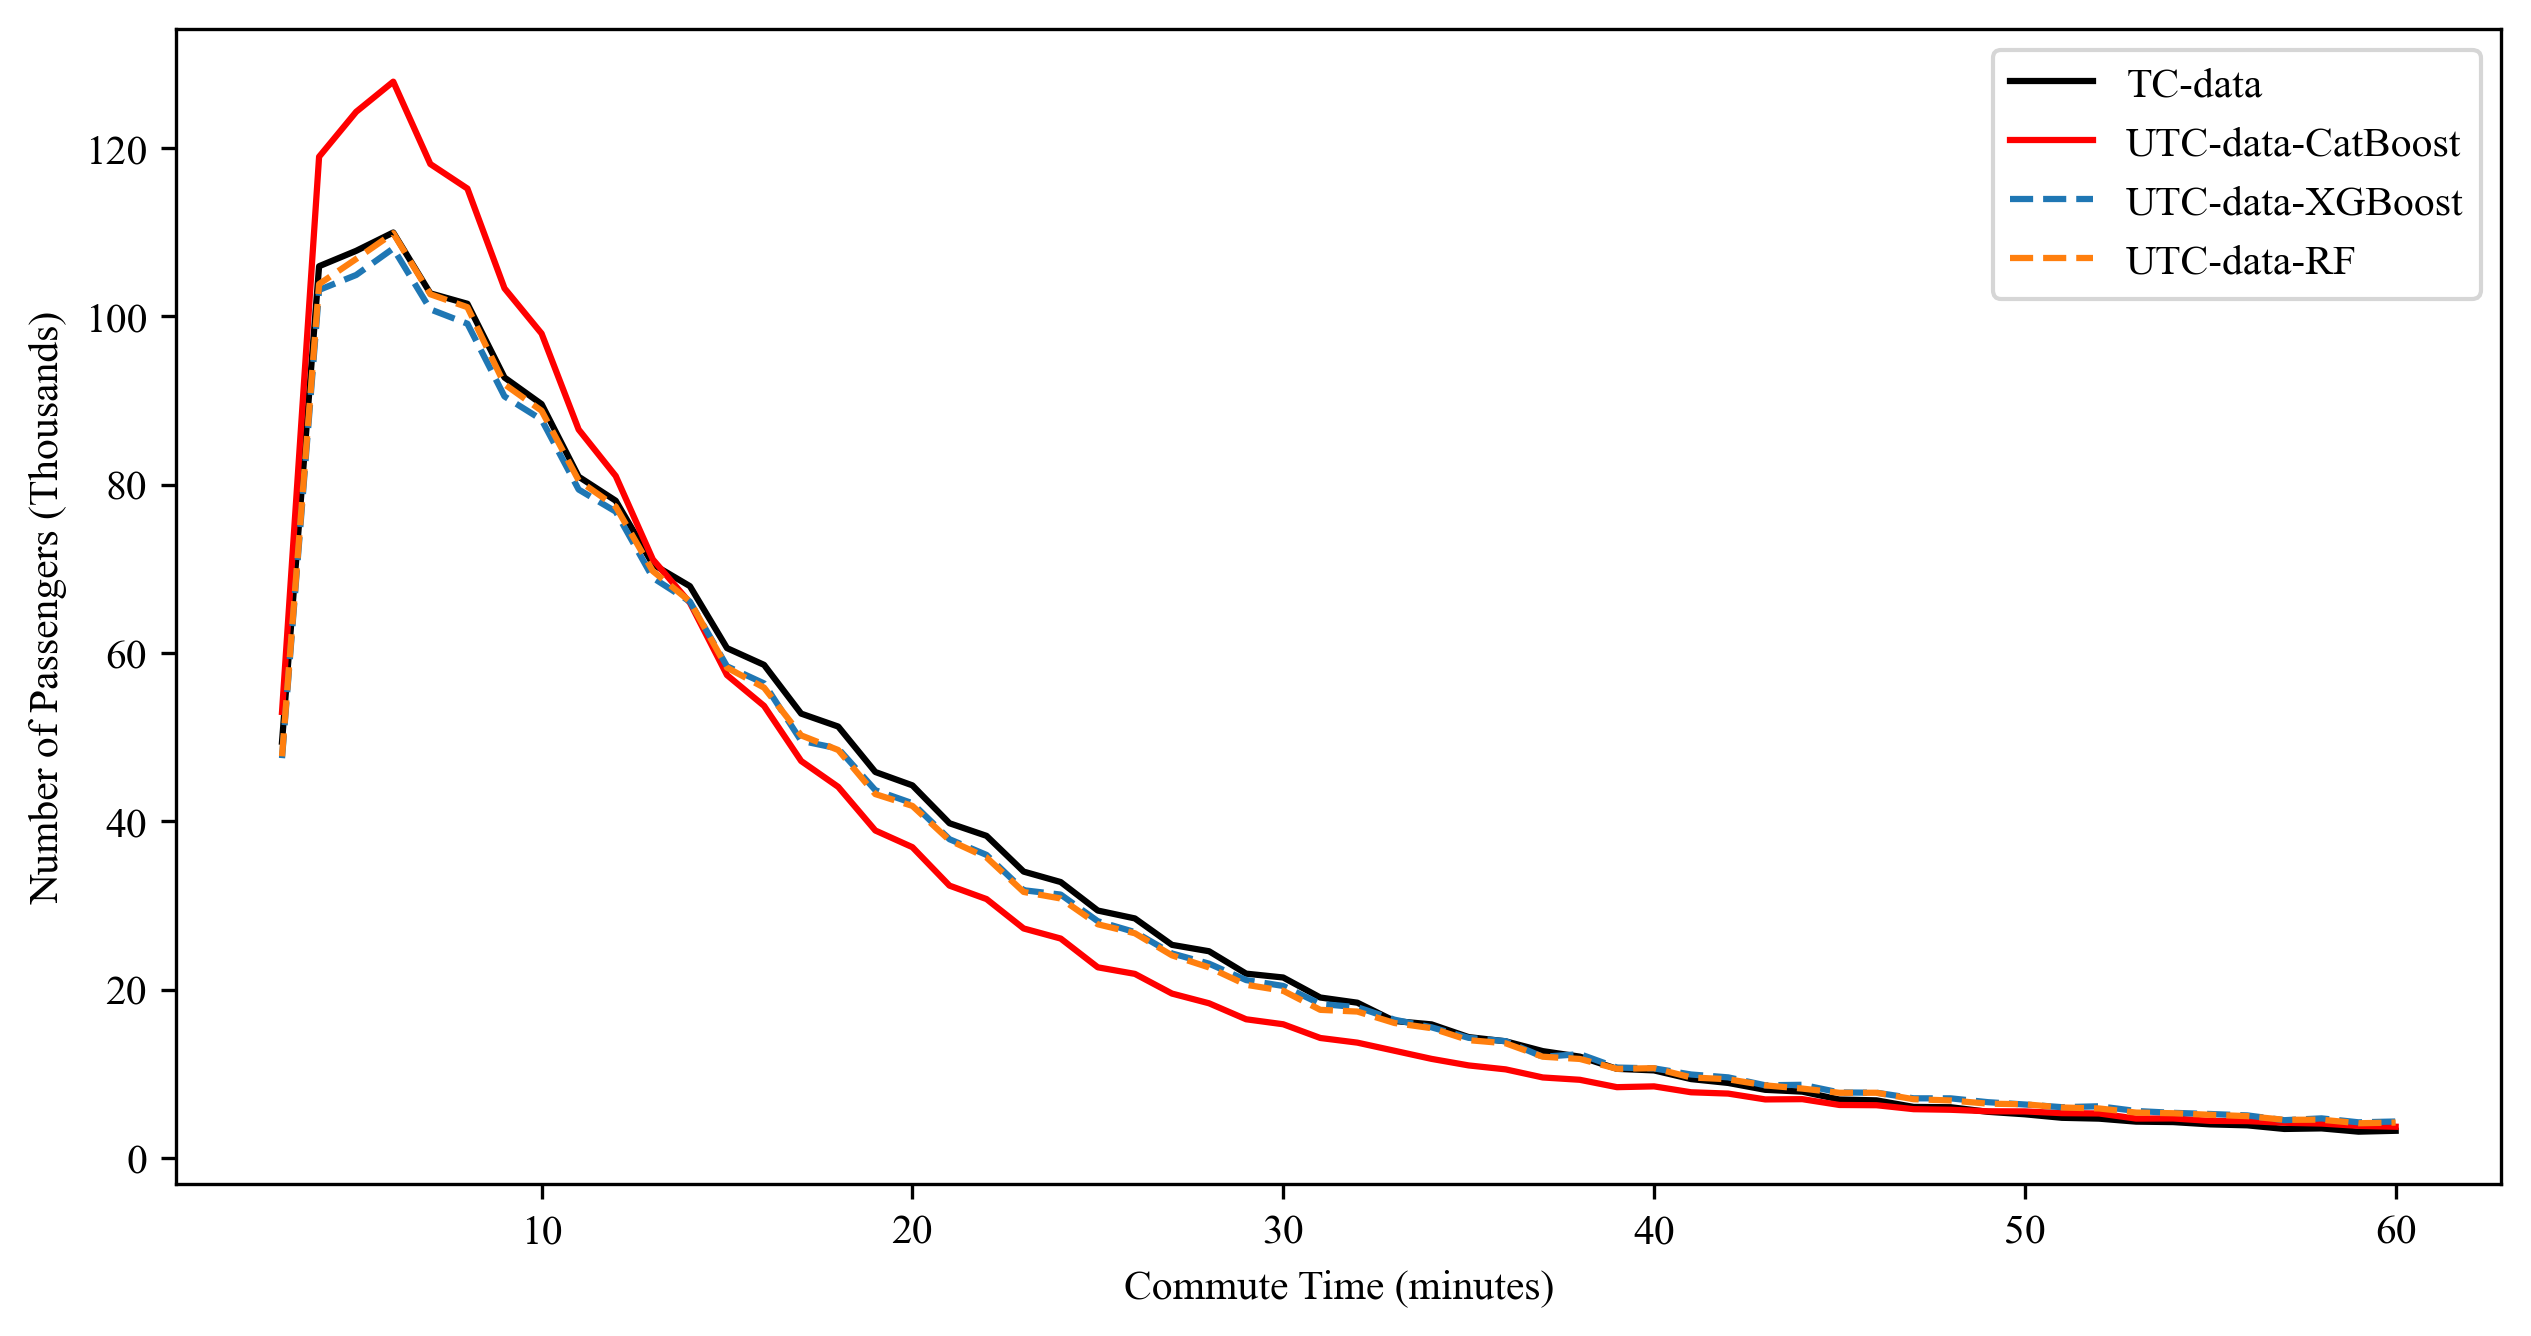

In [18]:
# 1min有round
fig = plt.figure(dpi=300,figsize=(10,5))
ax1 = plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
lw = 1.5
r = 1
ax1 = plt.plot(TC_data[r][:60].index,TC_data[r]['count'][:60] / 1000,label='TC-data',linewidth=lw,color='black')
ax1 = plt.plot(UTC_data_CatBoost[r][:60].index,UTC_data_CatBoost[r]['count'][:60] / 1000,label='UTC-data-CatBoost',linewidth=lw,color='red')
ax1 = plt.plot(UTC_data_XGBoost[r][:60].index,UTC_data_XGBoost[r]['count'][:60] / 1000,label='UTC-data-XGBoost',linewidth=lw, linestyle='--')
ax1 = plt.plot(UTC_data_RF[r][:60].index,UTC_data_RF[r]['count'][:60] / 1000,label='UTC-data-RF',linewidth=lw, linestyle='--')
# ax1 = plt.plot(UTC_data_SVM[r][:60].index,UTC_data_SVM[r]['count'][:60],label='UTC-data-SVM',linewidth=lw, linestyle='--')
plt.xlabel('Commute Time (minutes)')
plt.ylabel('Number of Passengers (Thousands)')
ax1 = plt.legend()

In [7]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score

In [8]:
def metrics_log(y_test,y_pre):
    y_test = np.log(y_test)
    y_pre = np.log(y_pre)
    from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
    mse = mean_squared_error(y_test,y_pre)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,y_pre)
    mape = mean_absolute_percentage_error(y_test,y_pre)
    r2 = r2_score(y_test,y_pre)
    return [rmse,mae,mape,r2]

In [9]:
metrics_log(TC_data[1]['count'],UTC_data_CatBoost[1]['count'])

[0.5704512609690041,
 0.5198169439894477,
 0.05607408269984735,
 0.8382178276719805]

In [10]:
metrics_log(TC_data[1]['count'],UTC_data_XGBoost[1]['count'])

[0.6406601459048413,
 0.613829251077849,
 0.06576862904712001,
 0.7959441780200524]

In [11]:
metrics_log(TC_data[1]['count'],UTC_data_RF[1]['count'])

[0.6218782725909971,
 0.5975322153128466,
 0.06390237558545618,
 0.8077331811473123]

In [ ]:
# 1min 有round 取对数
from matplotlib import rcParams
fig = plt.figure(dpi=300,figsize=(10,5))
rcParams['text.latex.preamble'] = r'\usepackage{xcolor}'  # 导入 xcolor 包
ax1 = plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
lw = 1.5
r = 1
ax1 = plt.plot(TC_data[r][:60].index,np.log(TC_data[r]['count'][:60]),label='TCD',linewidth=lw,color='blue')
ax1 = plt.plot(UTC_data_CatBoost[r][:60].index,np.log(UTC_data_CatBoost[r]['count'][:60]),label='UTCD-CatBoost',linewidth=lw,color='red')
ax1 = plt.plot(UTC_data_XGBoost[r][:60].index,np.log(UTC_data_XGBoost[r]['count'][:60]),label='UTCD-XGBoost',linewidth=lw, linestyle='--')
ax1 = plt.plot(UTC_data_RF[r][:60].index,np.log(UTC_data_RF[r]['count'][:60]),label='UTCD-RF',linewidth=lw, linestyle='--')
# ax1 = plt.plot(UTC_data_SVM[r][:60].index,UTC_data_SVM[r]['count'][:60],label='UTC-data-SVM',linewidth=lw, linestyle='--')
# plt.xlabel('Commute Time (minutes)')
# plt.ylabel('Number of Passengers (Thousands)')
# ax1 = plt.text(
#     x=10, 
#     y=3, 
#     s=r'CatBoost: \textcolor{red}{0.838}' ,  # 格式化 R² 值
#     fontsize=10,
# #     color='blue',
#     usetex=True,
#     ha='center',  # 水平居中
#     va='bottom',  # 垂直底部对齐
#     transform=plt.gca().transData,  # 使用数据坐标系
#     bbox=dict(
#         boxstyle="round,pad=0.3",  # 圆角矩形
#         fc="white",                # 背景色
#         ec="black",                # 边框颜色
#         alpha=0.8                  # 透明度
#     )
# )
plt.xlabel('Commute time (minutes)')
plt.ylabel('ln(Passengers)')
ax1 = plt.legend()

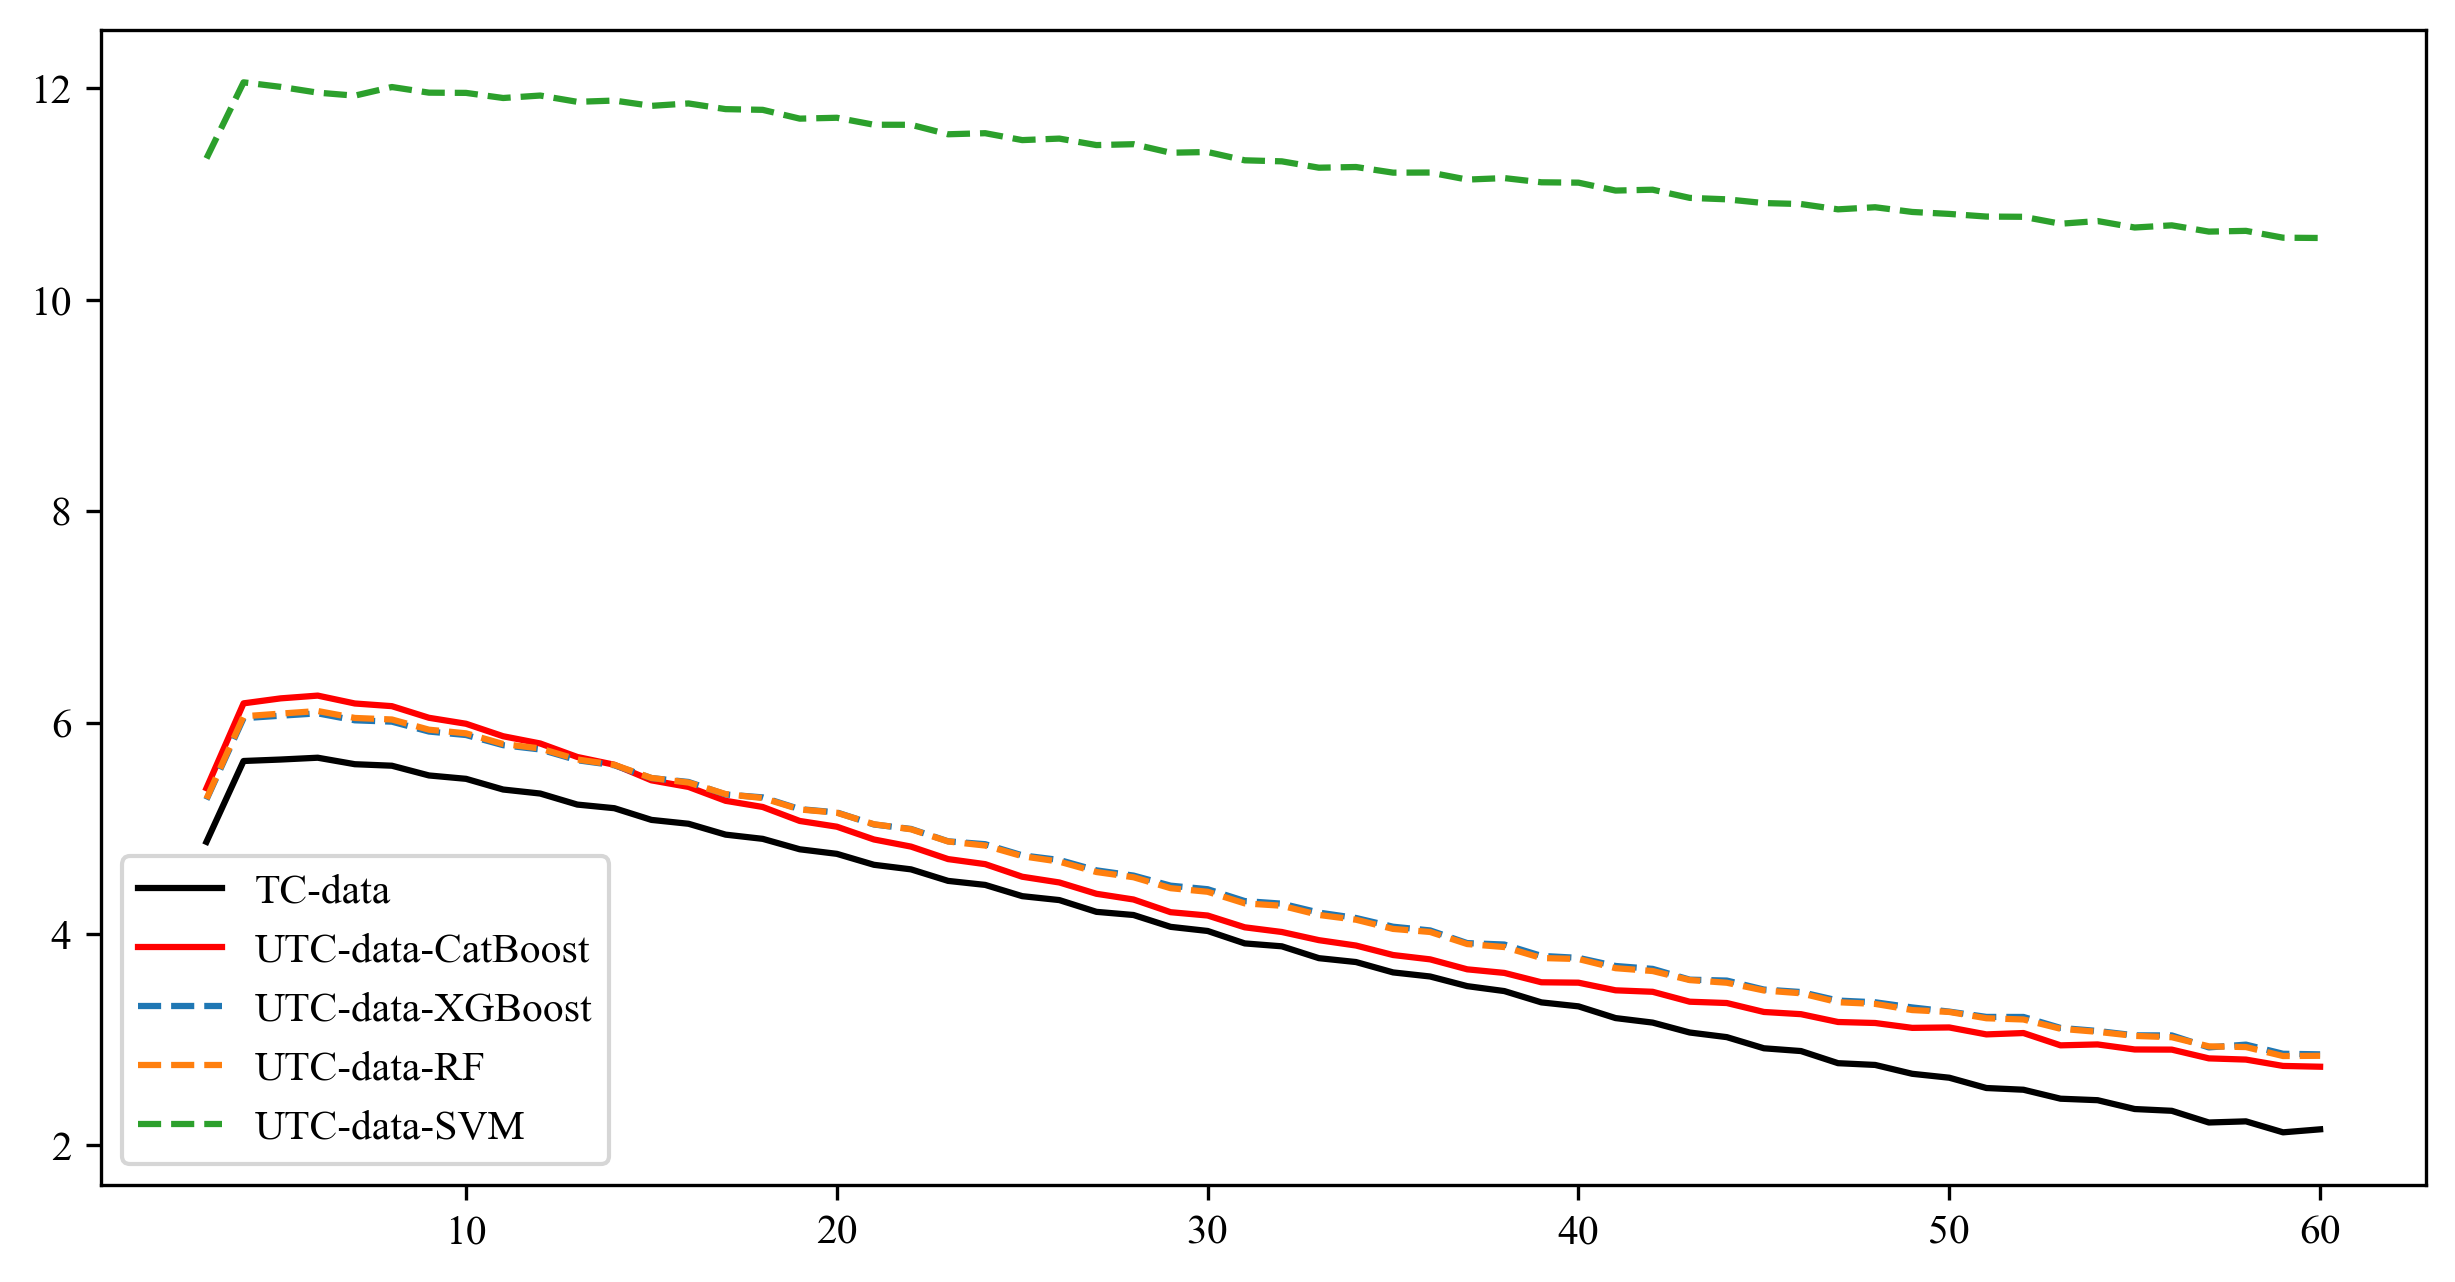

In [13]:
# 1min 有round 带SVM ln
fig = plt.figure(dpi=300,figsize=(10,5))
ax1 = plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
lw = 1.5
r = 1
ax1 = plt.plot(TC_data[r][:60].index,np.log(TC_data[r]['count'][:60] / 1000),label='TC-data',linewidth=lw,color='black')
ax1 = plt.plot(UTC_data_CatBoost[r][:60].index,np.log(UTC_data_CatBoost[r]['count'][:60] / 1000),label='UTC-data-CatBoost',linewidth=lw,color='red')
ax1 = plt.plot(UTC_data_XGBoost[r][:60].index,np.log(UTC_data_XGBoost[r]['count'][:60] / 1000),label='UTC-data-XGBoost',linewidth=lw, linestyle='--')
ax1 = plt.plot(UTC_data_RF[r][:60].index,np.log(UTC_data_RF[r]['count'][:60] / 1000),label='UTC-data-RF',linewidth=lw, linestyle='--')
ax1 = plt.plot(UTC_data_SVM[r][:60].index,np.log(UTC_data_SVM[r]['count'][:60]),label='UTC-data-SVM',linewidth=lw, linestyle='--')
ax1 = plt.legend()

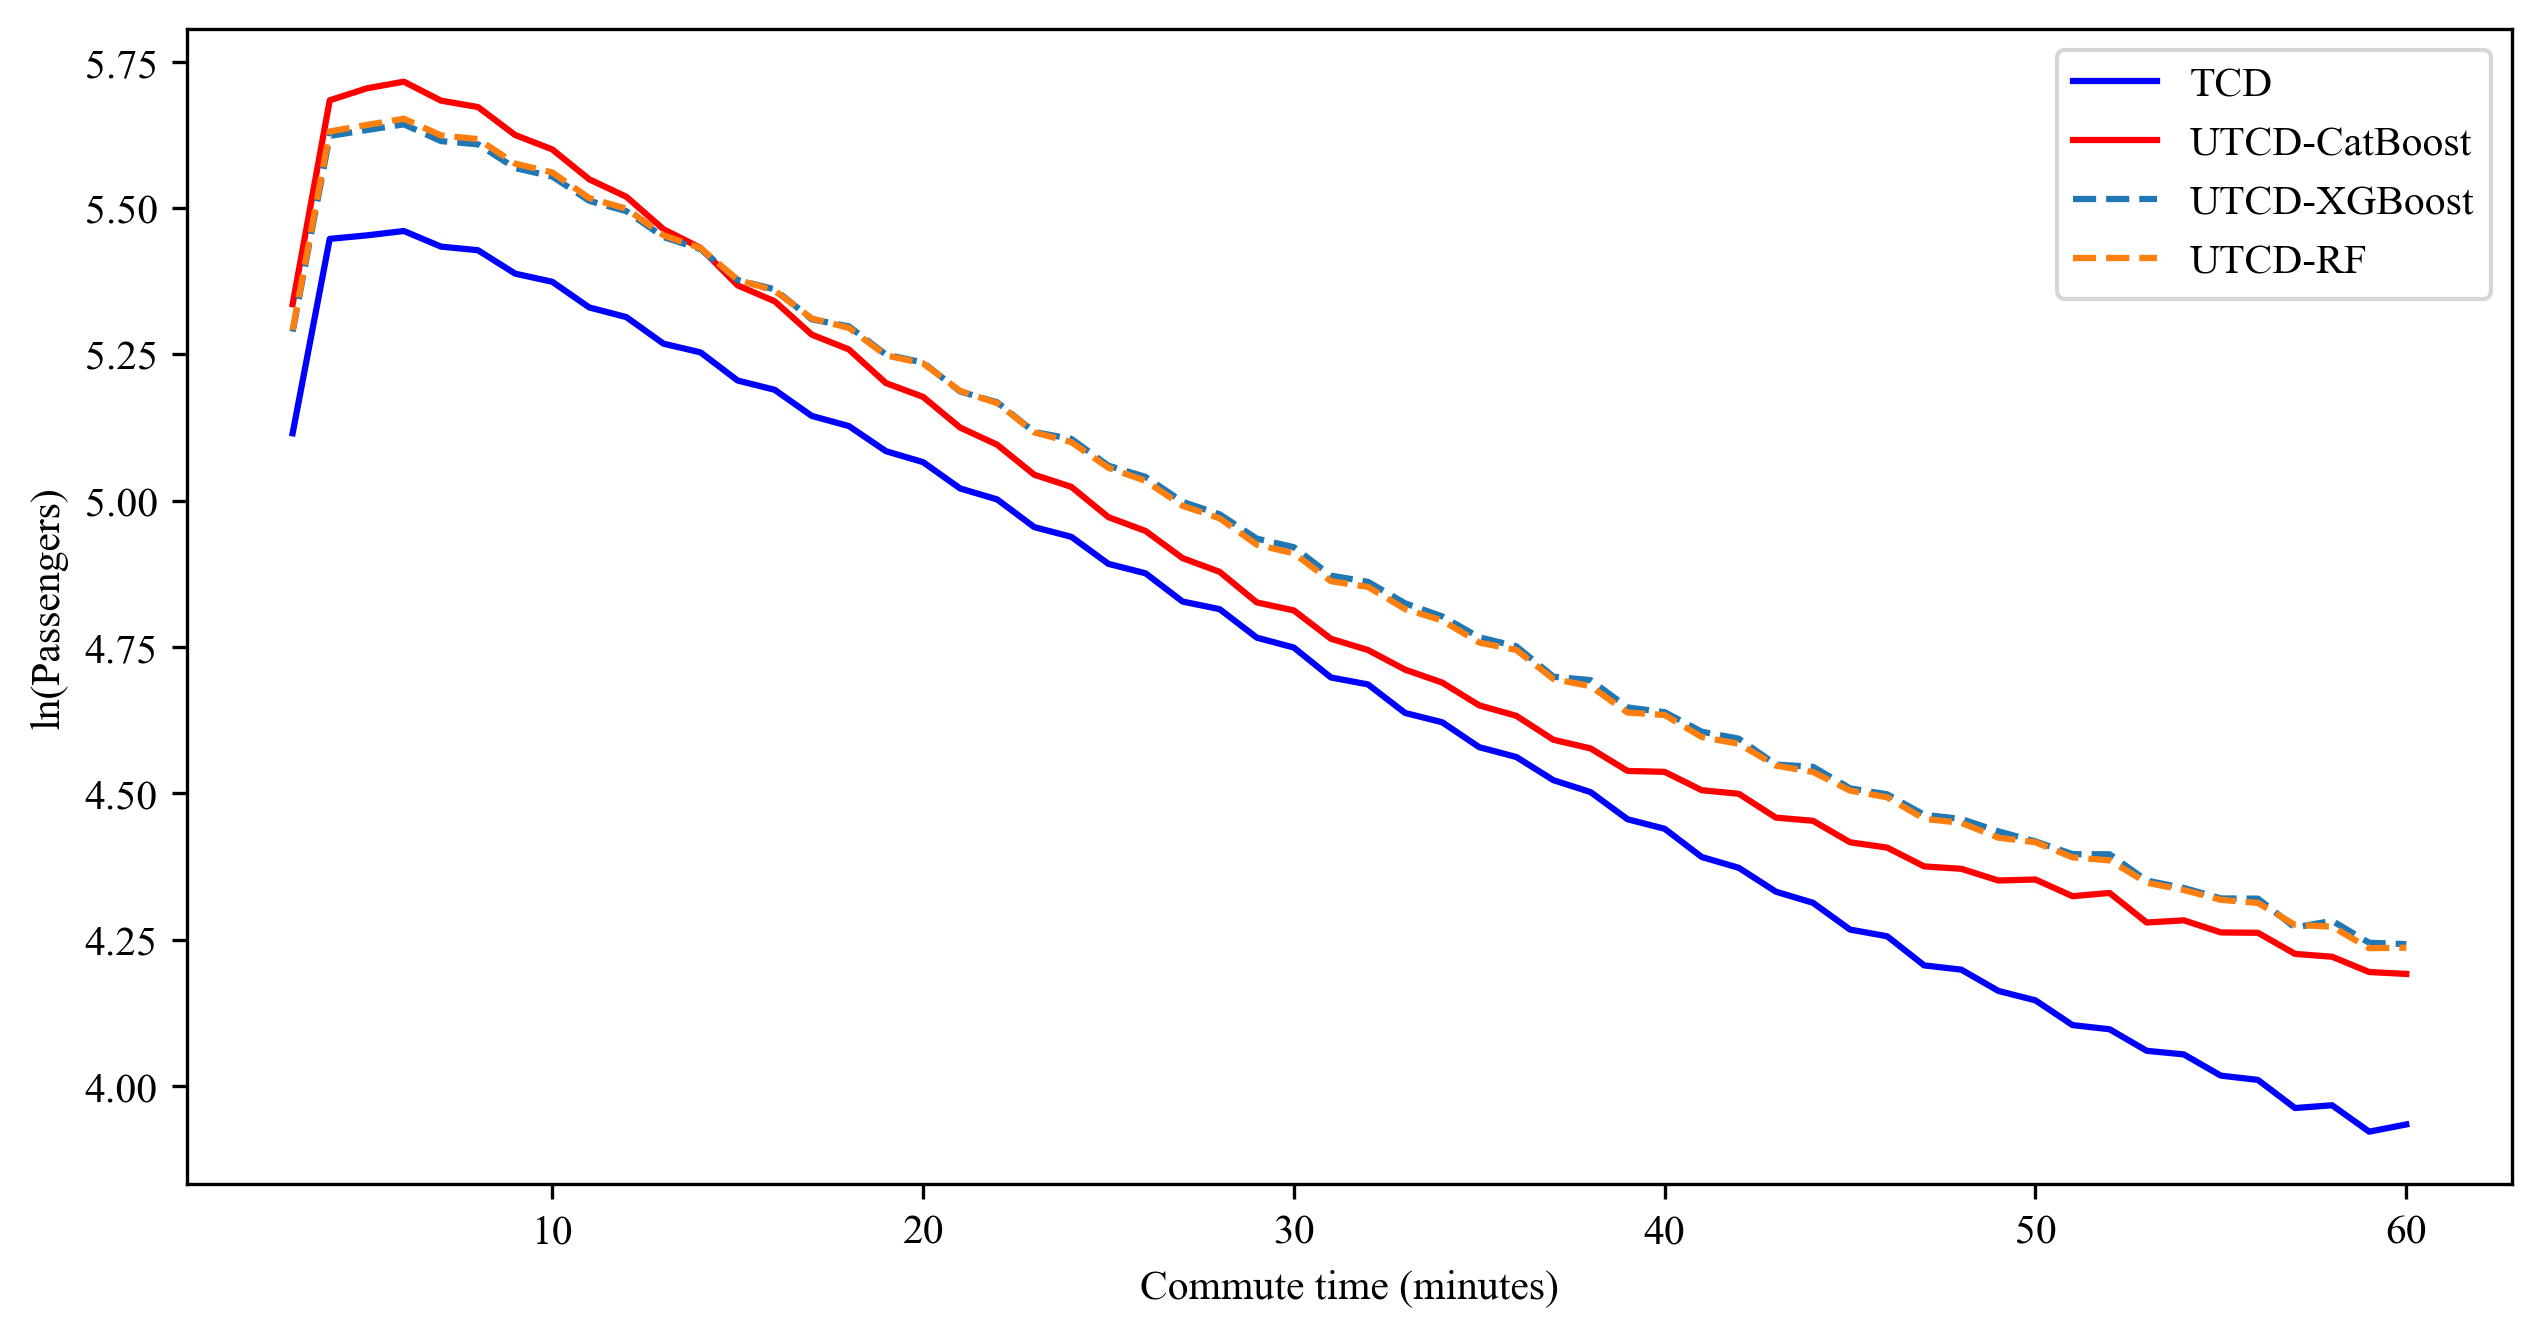

In [15]:
# 1min 有round 带SVM log10
fig = plt.figure(dpi=300,figsize=(10,5))
ax1 = plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
lw = 1.5
r = 1
ax1 = plt.plot(TC_data[r][:60].index,np.log10(TC_data[r]['count'][:60]),label='TCD',linewidth=lw,color='blue')
ax1 = plt.plot(UTC_data_CatBoost[r][:60].index,np.log10(UTC_data_CatBoost[r]['count'][:60]),label='UTCD-CatBoost',linewidth=lw,color='red')
ax1 = plt.plot(UTC_data_XGBoost[r][:60].index,np.log10(UTC_data_XGBoost[r]['count'][:60]),label='UTCD-XGBoost',linewidth=lw, linestyle='--')
ax1 = plt.plot(UTC_data_RF[r][:60].index,np.log10(UTC_data_RF[r]['count'][:60]),label='UTCD-RF',linewidth=lw, linestyle='--')
# ax1 = plt.plot(UTC_data_SVM[r][:60].index,np.log10(UTC_data_SVM[r]['count'][:60]),label='UTC-data-SVM',linewidth=lw, linestyle='--')
plt.xlabel('Commute time (minutes)')
plt.ylabel('ln(Passengers)')
ax1 = plt.legend()